In [9]:
!pip install kaggle;

In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:20<00:00, 45.5MB/s]
100% 812M/812M [00:20<00:00, 40.7MB/s]


In [13]:
!ls


dogs-vs-cats.zip  kaggle.json  sample_data


In [14]:
from zipfile import ZipFile
dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('DATASET EXTRACTED')

DATASET EXTRACTED


In [15]:
from zipfile import ZipFile
dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('DATASET EXTRACTED')

DATASET EXTRACTED


In [16]:
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [17]:
import os

path, dirs, files = next(os.walk('/content/train'))
file_count=len(files)

print("NO. OF IMAGES: ", file_count)

NO. OF IMAGES:  25000


In [18]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.1694.jpg', 'cat.9507.jpg', 'cat.12032.jpg', 'cat.1609.jpg', 'dog.5015.jpg', 'dog.1342.jpg', 'cat.7141.jpg', 'dog.7319.jpg', 'cat.7698.jpg', 'dog.6349.jpg', 'cat.5654.jpg', 'cat.7179.jpg', 'dog.11242.jpg', 'cat.5801.jpg', 'cat.12461.jpg', 'dog.4441.jpg', 'cat.2778.jpg', 'cat.6770.jpg', 'dog.9921.jpg', 'dog.10621.jpg', 'dog.7754.jpg', 'dog.11558.jpg', 'cat.7774.jpg', 'cat.9170.jpg', 'dog.10453.jpg', 'dog.2025.jpg', 'cat.286.jpg', 'dog.5411.jpg', 'dog.10785.jpg', 'dog.3564.jpg', 'dog.357.jpg', 'cat.4438.jpg', 'dog.9142.jpg', 'dog.5499.jpg', 'cat.2899.jpg', 'dog.5012.jpg', 'dog.5323.jpg', 'dog.11165.jpg', 'dog.7787.jpg', 'dog.6670.jpg', 'cat.9568.jpg', 'cat.11368.jpg', 'dog.6424.jpg', 'dog.7125.jpg', 'cat.9231.jpg', 'dog.1872.jpg', 'cat.863.jpg', 'cat.12138.jpg', 'cat.9737.jpg', 'dog.1139.jpg', 'dog.1240.jpg', 'cat.1721.jpg', 'cat.8911.jpg', 'dog.11620.jpg', 'cat.2687.jpg', 'dog.2331.jpg', 'cat.692.jpg', 'dog.9351.jpg', 'cat.11281.jpg', 'cat.10837.jpg', 'dog.9442.jpg', 'dog.1398.jpg'

In [21]:
file_names=os.listdir('/content/train/')

for i in range(5):
  name=file_names[i]
  print(name[0:3])

dog
cat
cat
cat
dog


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


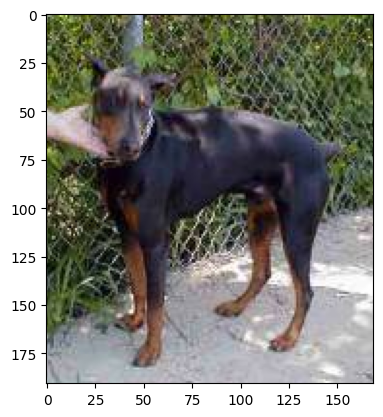

In [23]:
img= mpimg.imread('/content/train/dog.8281.jpg')
imgplt=plt.imshow(img)
plt.show()

In [24]:
file_names=os.listdir('/content/train')

for i in range(5):

  name=file_names[i]
  print(name[0:3])

dog
cat
cat
cat
dog


In [25]:
dog_count = 0
cat_count = 0

for img_file in file_names:
  name=img_file[0:3]

  if name=='dog':
    dog_count+=1

  else:
      cat_count+=1


print("NO. DOG IMGS: ", dog_count)
print("NO. CAT IMGS: ", cat_count)


NO. DOG IMGS:  12500
NO. CAT IMGS:  12500


In [26]:
os.mkdir('/content/image resized')

In [27]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

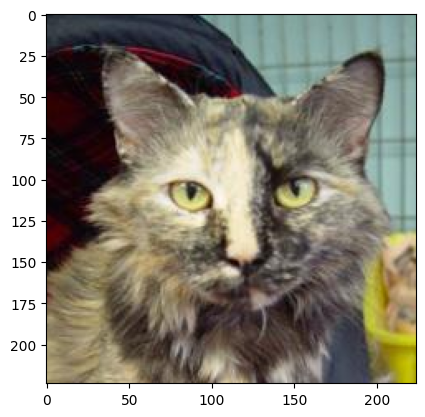

In [28]:
img= mpimg.imread('/content/image resized/cat.10.jpg')
imgplt=plt.imshow(img)
plt.show()

In [29]:
labels = []
filenames=os.listdir('/content/image resized/')

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)






In [30]:
print(filenames[0:5])
print(len(filenames))

['dog.1694.jpg', 'cat.9507.jpg', 'cat.12032.jpg', 'cat.1609.jpg', 'dog.5015.jpg']
2000


In [31]:
values, counts = np.unique(labels, return_counts=True)
print(values, counts)

[0 1] [1023  977]


In [32]:
import cv2
import glob

In [33]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_image = np.asarray([cv2.imread(file) for file in files])

In [34]:
type(dog_cat_image)

numpy.ndarray

In [35]:
print(dog_cat_image.shape)

(2000, 224, 224, 3)


In [36]:
X = dog_cat_image
Y = np.asarray(labels)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2) #20 percent is testing data

In [38]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1600, 224, 224, 3) (400, 224, 224, 3) (1600,) (400,)


In [39]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [53]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2
model = tf.keras.Sequential
 ([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 47s 861ms/step - loss: 0.2163 - acc: 0.9162
Epoch 2/5
50/50 [==============================] - 42s 838ms/step - loss: 0.0746 - acc: 0.9756
Epoch 3/5
50/50 [==============================] - 44s 872ms/step - loss: 0.0552 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 41s 824ms/step - loss: 0.0417 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 41s 825ms/step - loss: 0.0345 - acc: 0.9937


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 12s 866ms/step - loss: 0.0812 - acc: 0.9775
Test Loss = 0.0812455490231514
Test Accuracy = 0.9775000214576721


Path of the image to be predicted: /content/cat.jpg


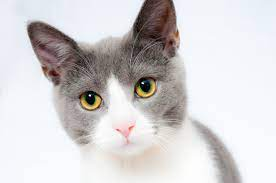

[[ 4.302739 -4.893738]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')